### visualize_boundary()

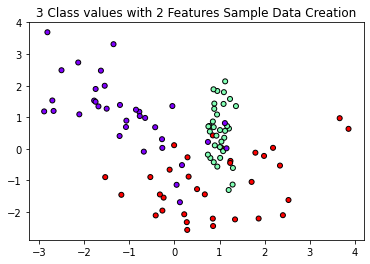

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

In [2]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\PC1\AppData\Local\Temp\ipykernel_11216\3405843115.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


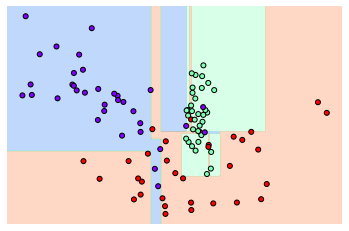

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# 특정한 트리 생성에 제약이 없는 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

 * 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐.
 * 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐
 * Over fitting(과대적합)

C:\Users\PC1\AppData\Local\Temp\ipykernel_11216\3405843115.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


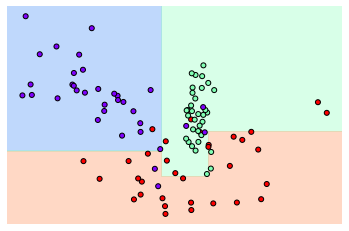

In [7]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

 * min_samples_leaf=6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 있도록 리프 노드 생성 규칙을 완화한 뒤 일반화된 분류 규칙이 되도록 적용